# NLP Lab Task — Preprocessing to Deployment with Twitter Sentiment Dataset

## Overview

This lab takes students through the **entire NLP pipeline** using a **Twitter Sentiment Analysis dataset** (tweets labeled as positive, negative, or neutral). Students will preprocess the data, represent it using multiple methods, train classical machine learning models, evaluate their results, and finally build a small API for deployment.

---

## Learning Objectives

* Apply text preprocessing (regex, case folding, tokenization, stopword removal, punctuation handling).
* Compare stemming and lemmatization, and use POS tagging to analyze counts of nouns, verbs, and adjectives.
* Build text representations using **Bag-of-Words**, **TF–IDF**, and **Word2Vec**.
* Train classical ML models inside an sklearn **Pipeline**.
* Evaluate models with standard metrics and perform basic error analysis.
* Save a trained pipeline and build a simple API to serve predictions.

---

## Dataset

We will use the **Sentiment140 Twitter dataset** (1.6M tweets, labeled positive/negative). For simplicity, you can work with a smaller balanced subset (e.g., 10k–20k tweets). This dataset is widely used for sentiment analysis and contains real, noisy text with mentions, hashtags, and emoticons.

Dataset link: [Sentiment140](http://help.sentiment140.com/for-students/)

---

## Step-by-Step Tasks

### 1) Exploratory Data Analysis (EDA)

* Load dataset, show class distribution, tweet length histogram, and a few sample tweets.
* Deliverable: 3 plots (class balance, length histogram, top frequent tokens) + 5 example tweets.

### 2) Regex Cleaning

* Remove URLs, mentions (@user), hashtags, emojis (or replace with tokens), and extra whitespace.
* Show a before-and-after example for at least 3 tweets.

### 3) Case Folding & Tokenization

* Convert all text to lowercase.
* Tokenize tweets using NLTK or spaCy.
* Compare vocabulary size before and after cleaning.

### 4) Stopwords, Punctuation, and Numbers

* Remove stopwords (with NLTK list, customizable).
* Decide how to handle punctuation and numbers (remove or replace with `<NUM>`).
* Deliverable: short explanation of your choice.

### 5) Stemming vs Lemmatization

* Use PorterStemmer (stemming) and spaCy lemmatizer.
* Show 20 sample words with their stem vs lemma.
* Train quick models with both and compare results.

### 6) POS Tagging (extra features)

* Use spaCy to count nouns, verbs, and adjectives per tweet.
* Add these counts as additional numeric features.
* Compare model with vs without POS features.

### 7) Text Representation

* Implement three representations:
  1. **Bag-of-Words** (CountVectorizer)
  2. **TF–IDF** (TfidfVectorizer)
  3. **Word2Vec** (pretrained embeddings, averaged per tweet)
* Compare vocabulary sizes and representation dimensions.

### 8) Modeling with Pipelines

* Use sklearn Pipelines to connect preprocessing + vectorizer + classifier.
* Models to try:
  * Multinomial Naive Bayes (for BoW/TF–IDF)
  * Logistic Regression
  * Linear SVM
* Deliverable: comparison table (accuracy, F1-score).

### 9) Evaluation & Error Analysis

* Use held-out test set.
* Metrics: accuracy, precision, recall, F1, confusion matrix.
* Show 10 misclassified tweets and discuss why they may be difficult.

### 10) Save Model Pipeline

* Save the best pipeline using `joblib` or `pickle`.
* Deliverable: `sentiment_model.pkl` file.

### 11) Build a Simple API (Deployment Step)

* Create a small Flask API with one endpoint `/predict` that accepts a tweet as input and returns sentiment prediction.
* The API should load the saved pipeline and make predictions.
* Deliverable: `app.py` with Flask code + test with a sample curl or Postman request.

---

## Deliverables

1. Jupyter Notebook with step-by-step tasks, results, and code.
2. Comparison tables for preprocessing choices and representations.
3. Saved pipeline file (`.pkl`).
4. Flask API script (`app.py`).
5. Short report in markdown cell summarizing preprocessing, modeling choices, and results.

---

This streamlined lab ensures students get hands-on experience with **real-world text preprocessing, classical modeling, and deployment of NLP systems**.


### 1. Load the Dataset

We will use the **Sentiment140 Twitter Sentiment dataset**.  
It contains 1.6 million tweets labeled as positive (4) or negative (0).  
For this lab, we will load a smaller subset (e.g., 20,000 rows) for faster experimentation.

```python
import pandas as pd

# Column order for Sentiment140 dataset:
# 0 - target (0 = negative, 4 = positive)
# 1 - ids
# 2 - date
# 3 - flag
# 4 - user
# 5 - text (tweet)

# Update the file path if needed
file_path = "sentiment140.csv"

# Load with proper encoding
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign column names
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map target labels: 0 → negative, 4 → positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Take a smaller sample for experiments (optional)
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Quick check
print(df.shape)
df.head()


In [3]:
import pandas as pd

import pandas as pd
import zipfile
import os
import requests

# Step 1: Download the dataset (if not already downloaded)
url = "https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"
zip_path = "trainingandtestdata.zip"

if not os.path.exists(zip_path):
    print("Downloading dataset...")
    r = requests.get(url)
    with open(zip_path, "wb") as f:
        f.write(r.content)

# Step 2: Unzip the file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(".")

# Step 3: Load training data
file_path = "training.1600000.processed.noemoticon.csv"

df = pd.read_csv(file_path, encoding="latin-1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map sentiment labels: 0 = negative, 4 = positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Optional: sample a smaller dataset for quicker experiments
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Preview the data
print(df.shape)
df.head()


# Load training set
train_path = "training.1600000.processed.noemoticon.csv"
train_df = pd.read_csv(train_path, encoding="latin-1", header=None)
train_df.columns = ["target", "id", "date", "flag", "user", "text"]
train_df["target"] = train_df["target"].map({0: "negative", 4: "positive"})

print("Training set:", train_df.shape)
print(train_df.head())

# Load manual test set
test_path = "testdata.manual.2009.06.14.csv"
test_df = pd.read_csv(test_path, encoding="latin-1", header=None)
test_df.columns = ["target", "id", "date", "flag", "user", "text"]

# This test set has labels 0 (negative), 2 (neutral), 4 (positive)
test_df["target"] = test_df["target"].map({0: "negative", 2: "neutral", 4: "positive"})

print("Test set:", test_df.shape)
print(test_df.head())


(20000, 6)
Training set: (1600000, 6)
     target          id                          date      flag  \
0  negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3  negative  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4  negative  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
Test set: (498, 6)
     target  id                          date     flag      user  \
0  positive   3  Mon May 11 03:17:40 UTC


#**IMPORTING LIBRARIES**

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import PorterStemmer
import spacy
import numpy as np
import pandas as pd
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import KeyedVectors
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **1) Exploratory Data Analysis (EDA)**

> show class distribution, tweet length histogram, and a few sample tweets



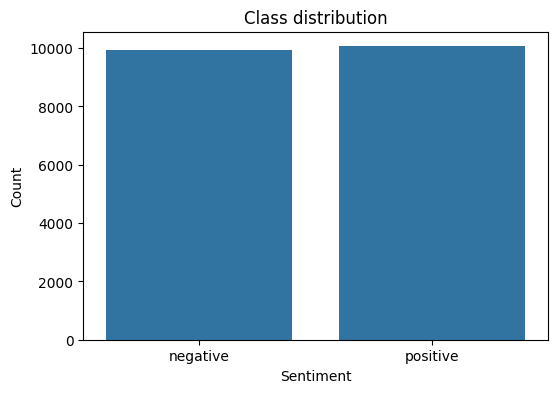

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df, order=["negative", "positive"])
plt.title("Class distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

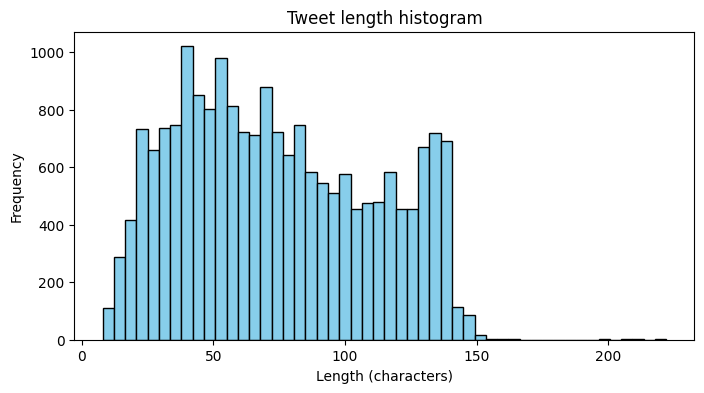

In [7]:
df["length"] = df["text"].str.len()
plt.figure(figsize=(8,4))
plt.hist(df["length"], bins=50, color="skyblue", edgecolor="black")
plt.title("Tweet length histogram")
plt.xlabel("Length (characters)")
plt.ylabel("Frequency")
plt.show()

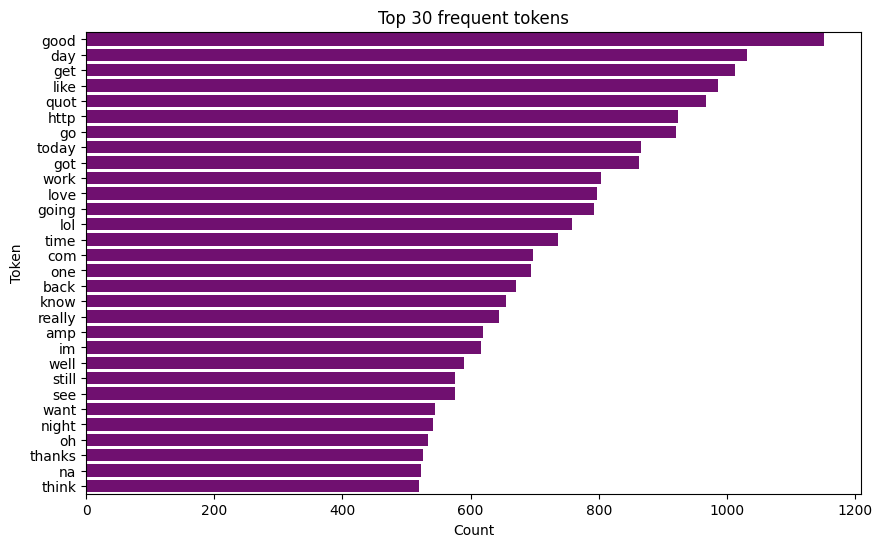

In [8]:
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = re.sub(r"http\\S+", "", str(text))   # remove URLs
    text = re.sub(r"@\\w+", "", text)           # remove mentions
    text = re.sub(r"#", "", text)               # remove hashtag symbol
    text = re.sub(r"[^a-zA-Z0-9\\s]", " ", text)
    text = text.lower()
    return text

all_tokens = []
for t in df["text"]:
    tokens = word_tokenize(clean_text(t))
    tokens = [w for w in tokens if w not in stop_words and len(w) > 1]
    all_tokens.extend(tokens)

top_tokens = Counter(all_tokens).most_common(30)

# plot
tokens, counts = zip(*top_tokens)
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(tokens), color="purple")
plt.title("Top 30 frequent tokens")
plt.xlabel("Count")
plt.ylabel("Token")
plt.show()

In [9]:
print("=== 5 Example Tweets ===")
print(df[["target", "text"]].sample(5, random_state=1))

=== 5 Example Tweets ===
         target                                               text
11456  positive  @RisaRM I really wish u well at re IMATS. Hope...
16528  negative  http://twitpic.com/7ls5h - Can't update @tweet...
3253   negative  @DanielFielding Ye I heard summet about that.....
18614  positive  @kingsmomma oh shucks!!! date and time! i'm do...
1544   negative                            @keishajay your invite 


# **2) Regex Cleaning**

> Remove URLs, mentions (@user), hashtags, emojis (or replace with tokens), and extra whitespace.



In [10]:
def regex_clean(text):
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)

    emoji_pattern = re.compile(
        "["u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"     # symbols & pictographs
        u"\U0001F680-\U0001F6FF"     # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"     # flags
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r"", text)

    text = re.sub(r"\s+", " ", text).strip()

    return text

In [11]:
sample_tweets = df["text"].sample(5).tolist()

for t in sample_tweets:
    print("Before:", t)
    print("After: ", regex_clean(t))
    print("-" * 60)

Before: Shoutout to @Caramel_tinny she like my older sista gotta love her thx for the help earlier 
After:  Shoutout to she like my older sista gotta love her thx for the help earlier
------------------------------------------------------------
Before: Need bed! But no bed at home 
After:  Need bed! But no bed at home
------------------------------------------------------------
Before: head achee. advil is so not helping right now 
After:  head achee. advil is so not helping right now
------------------------------------------------------------
Before: I don't like matt dose! He's meann and makes me sad 
After:  I don't like matt dose! He's meann and makes me sad
------------------------------------------------------------
Before: @EP31 @chollis Oh man, I won't be in Montreal.  #BlameitonMAF
After:  Oh man, I won't be in Montreal. BlameitonMAF
------------------------------------------------------------


# **3) Case Folding & Tokenization**

>* Convert all text to lowercase.
>* Tokenize tweets using NLTK



In [12]:
df["clean_text"] = df["text"].apply(regex_clean)

In [13]:
df["clean_text"] = df["clean_text"].str.lower()

In [14]:
df["tokens"] = df["clean_text"].apply(word_tokenize)

In [15]:
df.head()

,target,id,date,flag,user,text,length,clean_text,tokens
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,ahhh i hope your ok!!!,"[ahhh, i, hope, your, ok, !, !, !]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,"cool , i have no tweet apps for my razr 2","[cool, ,, i, have, no, tweet, apps, for, my, r..."
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,i know just family drama. its lame.hey next ti...,"[i, know, just, family, drama, ., its, lame.he..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,school email won't open and i have geography s...,"[school, email, wo, n't, open, and, i, have, g..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,upper airways problem,"[upper, airways, problem]"


In [16]:
# Vocabulary size before cleaning (raw lowercase text)
all_tokens_raw = [w for text in df["text"] for w in word_tokenize(text.lower())]
vocab_before = set(all_tokens_raw)

# Vocabulary size after regex cleaning + lowercase
all_tokens_clean = [w for tokens in df["tokens"] for w in tokens]
vocab_after = set(all_tokens_clean)

print("Vocabulary size before cleaning:", len(vocab_before))
print("Vocabulary size after cleaning: ", len(vocab_after))

Vocabulary size before cleaning: 32105
Vocabulary size after cleaning:  22383


In [17]:
print("\nSample tokens (first 5 tweets):")
for i in range(5):
    print(f"Original: {df['text'][i]}")
    print(f"Cleaned:  {df['clean_text'][i]}")
    print(f"Tokens:   {df['tokens'][i]}")
    print("-" * 50)


Sample tokens (first 5 tweets):
Original: @chrishasboobs AHHH I HOPE YOUR OK!!! 
Cleaned:  ahhh i hope your ok!!!
Tokens:   ['ahhh', 'i', 'hope', 'your', 'ok', '!', '!', '!']
--------------------------------------------------
Original: @misstoriblack cool , i have no tweet apps  for my razr 2
Cleaned:  cool , i have no tweet apps for my razr 2
Tokens:   ['cool', ',', 'i', 'have', 'no', 'tweet', 'apps', 'for', 'my', 'razr', '2']
--------------------------------------------------
Original: @TiannaChaos i know  just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u
Cleaned:  i know just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u
Tokens:   ['i', 'know', 'just', 'family', 'drama', '.', 'its', 'lame.hey', 'next', 'time', 'u', 'hang', 'out', 'with', 'kim', 'n', 'u', 'guys', 'like', 'have', 'a', 'sleepover', 'or', 'whatever', ',', 'ill', 'call', 'u']
-------------

# **4) Stopwords, Punctuation, and Numbers**

In [18]:
stop_words = set(stopwords.words('english'))

def clean_tokens(tokens):
    cleaned = []
    for w in tokens:

        if w.isdigit():
            cleaned.append("<NUM>")

        elif w not in string.punctuation and w not in stop_words and len(w) > 1:
            cleaned.append(w)
    return cleaned


In [19]:
df["tokens_clean"] = df["tokens"].apply(clean_tokens)

In [20]:
df.head()

,target,id,date,flag,user,text,length,clean_text,tokens,tokens_clean
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,ahhh i hope your ok!!!,"[ahhh, i, hope, your, ok, !, !, !]","[ahhh, hope, ok]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,"cool , i have no tweet apps for my razr 2","[cool, ,, i, have, no, tweet, apps, for, my, r...","[cool, tweet, apps, razr, <NUM>]"
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,i know just family drama. its lame.hey next ti...,"[i, know, just, family, drama, ., its, lame.he...","[know, family, drama, lame.hey, next, time, ha..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,school email won't open and i have geography s...,"[school, email, wo, n't, open, and, i, have, g...","[school, email, wo, n't, open, geography, stuf..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,upper airways problem,"[upper, airways, problem]","[upper, airways, problem]"


In [21]:
vocab_after_stop = set([w for tokens in df["tokens_clean"] for w in tokens])

print("Vocabulary size before stopwords removal:", len(vocab_after))
print("Vocabulary size after stopwords removal: ", len(vocab_after_stop))

Vocabulary size before stopwords removal: 22383
Vocabulary size after stopwords removal:  21957


In [22]:
print("\nSample cleaned tokens (first 5 tweets):")
for i in range(5):
    print(f"Original tokens: {df['tokens'][i]}")
    print(f"Cleaned tokens: {df['tokens_clean'][i]}")
    print("-" * 50)


Sample cleaned tokens (first 5 tweets):
Original tokens: ['ahhh', 'i', 'hope', 'your', 'ok', '!', '!', '!']
Cleaned tokens: ['ahhh', 'hope', 'ok']
--------------------------------------------------
Original tokens: ['cool', ',', 'i', 'have', 'no', 'tweet', 'apps', 'for', 'my', 'razr', '2']
Cleaned tokens: ['cool', 'tweet', 'apps', 'razr', '<NUM>']
--------------------------------------------------
Original tokens: ['i', 'know', 'just', 'family', 'drama', '.', 'its', 'lame.hey', 'next', 'time', 'u', 'hang', 'out', 'with', 'kim', 'n', 'u', 'guys', 'like', 'have', 'a', 'sleepover', 'or', 'whatever', ',', 'ill', 'call', 'u']
Cleaned tokens: ['know', 'family', 'drama', 'lame.hey', 'next', 'time', 'hang', 'kim', 'guys', 'like', 'sleepover', 'whatever', 'ill', 'call']
--------------------------------------------------
Original tokens: ['school', 'email', 'wo', "n't", 'open', 'and', 'i', 'have', 'geography', 'stuff', 'on', 'there', 'to', 'revise', '!', '*', 'stupid', 'school', '*', ':', "'", 

### *Handling Punctuation and Numbers*

---



- **Punctuation**: I chose to remove all punctuation marks (such as `. , ! ?`) because they do not provide strong semantic meaning in the Sentiment140 dataset. This helps reduce noise and simplify the token set.  

- **Numbers**: Instead of removing numbers, I replaced them with the token `<NUM>`. This way, the model can still capture the information that a number appears in a tweet without treating each different number as a unique token.


# **5) Stemming vs Lemmatization**

### PorterStemmer

In [23]:
stemmer = PorterStemmer()
df["stemmed"] = df["tokens_clean"].apply(lambda tokens: [stemmer.stem(w) for w in tokens])

### spaCy Lemmatizer

In [24]:
nlp = spacy.load("en_core_web_sm", disable=["parser","ner"])
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

df["lemmatized"] = df["tokens_clean"].apply(lemmatize_tokens)

In [25]:
# 3) Show 20 words comparison
sample_words = df["tokens_clean"].explode().dropna().unique()[:20]
print("{:<15} {:<15} {:<15}".format("Word", "Stem", "Lemma"))
print("-"*45)
for w in sample_words:
    print("{:<15} {:<15} {:<15}".format(w, stemmer.stem(w), nlp(w)[0].lemma_))

Word            Stem            Lemma          
---------------------------------------------
ahhh            ahhh            ahhh           
hope            hope            hope           
ok              ok              ok             
cool            cool            cool           
tweet           tweet           tweet          
apps            app             app            
razr            razr            razr           
<NUM>           <num>           <              
know            know            know           
family          famili          family         
drama           drama           drama          
lame.hey        lame.hey        lame.hey       
next            next            next           
time            time            time           
hang            hang            hang           
kim             kim             kim            
guys            guy             guy            
like            like            like           
sleepover       sleepov         sleepover 

In [26]:
df.head()

,target,id,date,flag,user,text,length,clean_text,tokens,tokens_clean,stemmed,lemmatized
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,ahhh i hope your ok!!!,"[ahhh, i, hope, your, ok, !, !, !]","[ahhh, hope, ok]","[ahhh, hope, ok]","[ahhh, hope, ok]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,"cool , i have no tweet apps for my razr 2","[cool, ,, i, have, no, tweet, apps, for, my, r...","[cool, tweet, apps, razr, <NUM>]","[cool, tweet, app, razr, <num>]","[cool, tweet, app, razr, <, NUM, >]"
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,i know just family drama. its lame.hey next ti...,"[i, know, just, family, drama, ., its, lame.he...","[know, family, drama, lame.hey, next, time, ha...","[know, famili, drama, lame.hey, next, time, ha...","[know, family, drama, lame.hey, next, time, ha..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,school email won't open and i have geography s...,"[school, email, wo, n't, open, and, i, have, g...","[school, email, wo, n't, open, geography, stuf...","[school, email, wo, n't, open, geographi, stuf...","[school, email, will, not, open, geography, st..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,upper airways problem,"[upper, airways, problem]","[upper, airways, problem]","[upper, airway, problem]","[upper, airway, problem]"


### **Quick model comparison**

In [27]:
# Prepare data
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["target"], test_size=0.2, random_state=42
)

Model for stemming

In [28]:
stem_texts = [" ".join(tokens) for tokens in df["stemmed"]]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    stem_texts, df["target"], test_size=0.2, random_state=42
)

vec_s = TfidfVectorizer(max_features=5000)
X_train_s_vec = vec_s.fit_transform(X_train_s)
X_test_s_vec = vec_s.transform(X_test_s)

clf_s = LogisticRegression(max_iter=1000)
clf_s.fit(X_train_s_vec, y_train_s)
pred_s = clf_s.predict(X_test_s_vec)

Model for lemmatization

In [29]:
lemma_texts = [" ".join(tokens) for tokens in df["lemmatized"]]

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    lemma_texts, df["target"], test_size=0.2, random_state=42
)

vec_l = TfidfVectorizer(max_features=5000)
X_train_l_vec = vec_l.fit_transform(X_train_l)
X_test_l_vec = vec_l.transform(X_test_l)

clf_l = LogisticRegression(max_iter=1000)
clf_l.fit(X_train_l_vec, y_train_l)
pred_l = clf_l.predict(X_test_l_vec)

In [30]:
# Evaluation
print("\nModel Comparison:")
print("-"*45)
print("Stemming - Accuracy:", accuracy_score(y_test_s, pred_s),
      "F1:", f1_score(y_test_s, pred_s, average="weighted"))
print("Lemmatization - Accuracy:", accuracy_score(y_test_l, pred_l),
      "F1:", f1_score(y_test_l, pred_l, average="weighted"))


Model Comparison:
---------------------------------------------
Stemming - Accuracy: 0.732 F1: 0.7318036413373541
Lemmatization - Accuracy: 0.7395 F1: 0.7393430559558695


# **6) POS Tagging**

In [31]:
nlp = spacy.load("en_core_web_sm", disable=["parser","ner"])

In [32]:
def pos_counts(text):
    doc = nlp(text)
    nouns = sum(1 for token in doc if token.pos_ == "NOUN")
    verbs = sum(1 for token in doc if token.pos_ == "VERB")
    adjs  = sum(1 for token in doc if token.pos_ == "ADJ")
    return [nouns, verbs, adjs]

In [33]:
lemma_texts = [" ".join(tokens) for tokens in df["lemmatized"]]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    lemma_texts, df["target"], test_size=0.2, random_state=42
)

In [35]:
vec = TfidfVectorizer(max_features=5000)
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)
pred_base = clf.predict(X_test_vec)

print("Without POS - Accuracy:", accuracy_score(y_test, pred_base),
      "F1:", f1_score(y_test, pred_base, average="weighted"))

Without POS - Accuracy: 0.7395 F1: 0.7393430559558695


In [36]:
X_train_pos = np.array([pos_counts(text) for text in X_train])
X_test_pos = np.array([pos_counts(text) for text in X_test])

# Combine TF-IDF features with POS features
X_train_combined = hstack([X_train_vec, X_train_pos])
X_test_combined = hstack([X_test_vec, X_test_pos])

clf_pos = LogisticRegression(max_iter=1000)
clf_pos.fit(X_train_combined, y_train)
pred_pos = clf_pos.predict(X_test_combined)

print("With POS - Accuracy:", accuracy_score(y_test, pred_pos),
      "F1:", f1_score(y_test, pred_pos, average="weighted"))

With POS - Accuracy: 0.738 F1: 0.7378548772054828


# **7) Text Representation**

In [37]:
texts = [" ".join(tokens) for tokens in df["lemmatized"]]

### Bag-of-Words

In [38]:
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(texts)

print("Vocabulary size:", len(bow_vectorizer.vocabulary_))
print("Representation shape:", X_bow.shape)

Vocabulary size: 5000
Representation shape: (20000, 5000)


### TF-IDF

In [39]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(texts)

print("Vocabulary size:", len(tfidf_vectorizer.vocabulary_))
print("Representation shape:", X_tfidf.shape)

Vocabulary size: 5000
Representation shape: (20000, 5000)


### Word2Vec

In [40]:
import gensim.downloader as api
w2v_model = api.load("glove-twitter-100")


def avg_word2vec(tokens, model, k=100):
    vecs = []
    for word in tokens:
        if word in model:
            vecs.append(model[word])
    if len(vecs) == 0:
        return np.zeros(k)
    else:
        return np.mean(vecs, axis=0)

X_w2v = np.vstack([avg_word2vec(tokens, w2v_model, 100) for tokens in df["lemmatized"]])

print("Embedding dimension:", X_w2v.shape[1])
print("Representation shape:", X_w2v.shape)

Embedding dimension: 100
Representation shape: (20000, 100)


# **8) Modeling**

In [44]:
df["final_clean_text"] = df["tokens_clean"].apply(lambda x: " ".join(x))


In [53]:
X = df["final_clean_text"]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Naive Bayes (BoW)

In [54]:
pipe_nb_bow = Pipeline([
    ("vect", CountVectorizer(max_features=5000)),
    ("clf", MultinomialNB())
])

pipe_nb_bow.fit(X_train, y_train)
preds_nb_bow = pipe_nb_bow.predict(X_test)

print("Naive Bayes (BoW)")
print("Accuracy:", accuracy_score(y_test, preds_nb_bow))
print("F1-score:", f1_score(y_test, preds_nb_bow, average="weighted"))

Naive Bayes (BoW)
Accuracy: 0.72375
F1-score: 0.7237445609116948


### Naive Bayes (TF–IDF)

In [55]:
pipe_nb_tfidf = Pipeline([
    ("vect", TfidfVectorizer(max_features=5000)),
    ("clf", MultinomialNB())
])

pipe_nb_tfidf.fit(X_train, y_train)
preds_nb_tfidf = pipe_nb_tfidf.predict(X_test)

print("Naive Bayes (TF–IDF)")
print("Accuracy:", accuracy_score(y_test, preds_nb_tfidf))
print("F1-score:", f1_score(y_test, preds_nb_tfidf, average="weighted"))

Naive Bayes (TF–IDF)
Accuracy: 0.72575
F1-score: 0.7257460402461142


### Logistic Regression (TF–IDF)

In [56]:
# Logistic Regression with TF–IDF
pipe_logreg = Pipeline([
    ("vect", TfidfVectorizer(max_features=5000)),
    ("clf", LogisticRegression(max_iter=1000))
])

pipe_logreg.fit(X_train, y_train)
preds_logreg = pipe_logreg.predict(X_test)

print("Logistic Regression (TF–IDF)")
print("Accuracy:", accuracy_score(y_test, preds_logreg))
print("F1-score:", f1_score(y_test, preds_logreg, average="weighted"))

Logistic Regression (TF–IDF)
Accuracy: 0.72625
F1-score: 0.7260816633912403


### Linear SVM with TF–IDF

In [57]:
# Linear SVM with TF–IDF
pipe_svm = Pipeline([
    ("vect", TfidfVectorizer(max_features=5000)),
    ("clf", LinearSVC())
])

pipe_svm.fit(X_train, y_train)
preds_svm = pipe_svm.predict(X_test)

print("Linear SVM (TF–IDF)")
print("Accuracy:", accuracy_score(y_test, preds_svm))
print("F1-score:", f1_score(y_test, preds_svm, average="weighted"))


Linear SVM (TF–IDF)
Accuracy: 0.7065
F1-score: 0.7063641713570983


**comparison table**

---



| Model                                      | Accuracy | F1-score|
|--------------------------------------------|---------|----------|
| Naive Bayes (BoW)                          | 0.7238  | 0.7237   |
| Naive Bayes (TF–IDF)                       | 0.7258  | 0.7257   |
| Logistic Regression (TF–IDF)               | 0.7263  | 0.7261   |
| Linear SVM (TF–IDF)                        | 0.7065  | 0.7064   |


# **9) Evaluation & Error Analysis**

In [59]:
best_model = pipe_logreg       #LR

In [60]:
y_pred = best_model.predict(X_test)

In [61]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.70      0.72      1987
    positive       0.72      0.75      0.73      2013

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



In [62]:
cm = confusion_matrix(y_test, y_pred, labels=["negative","positive"])
cm_df = pd.DataFrame(cm, index=["Actual Negative","Actual Positive"],
                     columns=["Predicted Negative","Predicted Positive"])
print("\nConfusion Matrix:")
print(cm_df)


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                1396                 591
Actual Positive                 504                1509


In [64]:
misclassified_idx = np.where(y_test != y_pred)[0]
misclassified_samples = pd.DataFrame({
    "Tweet": X_test.iloc[misclassified_idx],
    "Actual": y_test.iloc[misclassified_idx],
    "Predicted": y_pred[misclassified_idx]
})

print("\n10 Misclassified Tweets:")
print(misclassified_samples.sample(10, random_state=42))


10 Misclassified Tweets:
                                                   Tweet    Actual Predicted
14236                              im kinda hopin 's atl  positive  negative
1084   gi sounds stupid tell any1 bout pic tht sent s...  positive  negative
10807  tom ear still 'peeee concert yesterday annoyin...  positive  negative
5227   everyone invited 're right ... weather n't loo...  negative  positive
8359                    somehow knew coke zero good true  negative  positive
4528   want laptop wish macs n't schools victoria get...  positive  negative
11233  jordans leaving party tonight going great thin...  negative  positive
18385             newly launched locks firefox time time  negative  positive
19474  starbucks hiding pouring rain got umbrella jac...  negative  positive
2885   's raining ... always something weather chicag...  negative  positive


###  Why Some Tweets Are Difficult to Classify

---



model struggled with certain tweets due to the following reasons:

- **Negation and sarcasm**: Phrases like "not happy" or ironic statements confuse classical models.  
- **Positive words in negative context**: Words like "great" or "good" can mislead the model when overall sentiment is negative.  
- **Short or ambiguous text**: Very short tweets or those lacking clear sentiment cues are hard to classify.  
- **Noisy content**: Mentions, hashtags, and informal language add complexity.  

These issues highlight the limitations of keyword-based models like TF–IDF + Logistic Regression in capturing context and subtle sentiment.


# **10) Saving Model**

In [65]:
import joblib

joblib.dump(pipe_logreg, "sentiment_model.pkl")
print("Model saved as sentiment_model.pkl")


Model saved as sentiment_model.pkl
